# City of Chicago Crimes Data Exploration (With log transformation)

In [1]:
import pandas as pd
import os
from pathlib import Path
import coordinates

In [2]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Change to the parent directory
os.chdir(parent_dir)

# Print the new current working directory to confirm
print("Changed to:", os.getcwd())

Changed to: C:\Users\chloe\OneDrive\AY2024 FYP\FYP-Code\FYP-Spatial-Analytics


# Data Package Introduction

In [3]:
df = pd.read_csv("Data/crimes.csv")
df.describe()

ID       District           Ward  Community Area  \
count  4.993170e+05  499317.000000  499304.000000   499317.000000   
mean   1.292516e+07      11.318767      23.251969       36.274527   
std    7.028720e+05       7.098315      14.106800       21.562981   
min    2.654300e+04       1.000000       1.000000        1.000000   
25%    1.277560e+07       5.000000      10.000000       22.000000   
50%    1.295900e+07      10.000000      24.000000       32.000000   
75%    1.314454e+07      17.000000      34.000000       53.000000   
max    1.334356e+07      31.000000      50.000000       77.000000   

       X Coordinate  Y Coordinate           Year       Latitude      Longitude  
count  4.950860e+05  4.950860e+05  499317.000000  495086.000000  495086.000000  
mean   1.165355e+06  1.887202e+06    2022.521645      41.846062     -87.668691  
std    1.655756e+04  3.200432e+04       0.499892       0.088021       0.060218  
min    0.000000e+00  0.000000e+00    2022.000000      36.619446     -91.686566  
25%    1.153938e+06  1.859491e+06    2022.000000      41.769868     -87.710210  
50%    1.167163e+06  1.893471e+06    2023.000000      41.863375     -87.661857  
75%    1.176816e+06  1.910237e+06    2023.000000      41.909616     -87.626649  
max    1.205119e+06  1.951506e+06    2024.000000      42.022549     -87.524532

In [4]:
df

ID Case Number                    Date  \
0       13325102    JH100383  01/01/2024 12:35:00 AM   
1       13324869    JH100080  01/01/2024 12:32:00 AM   
2       13334424    JH111086  01/01/2024 12:30:00 AM   
3       13330629    JH106692  01/01/2024 12:30:00 AM   
4       13324809    JH100033  01/01/2024 12:30:00 AM   
...          ...         ...                     ...   
499312  12591578    JF111765  01/01/2022 12:50:00 AM   
499313  12581825    JF100053  01/01/2022 12:50:00 AM   
499314  12581804    JF100047  01/01/2022 12:48:00 AM   
499315  12585133    JF104070  01/01/2022 12:48:00 AM   
499316  12581862    JF100062  01/01/2022 12:38:00 AM   

                      Primary Type                         Description  \
0                  CRIMINAL DAMAGE                          TO VEHICLE   
1                          BATTERY             DOMESTIC BATTERY SIMPLE   
2       OFFENSE INVOLVING CHILDREN                       OTHER OFFENSE   
3                  CRIMINAL DAMAGE                          TO VEHICLE   
4                          BATTERY                              SIMPLE   
...                            ...                                 ...   
499312                     BATTERY             DOMESTIC BATTERY SIMPLE   
499313             CRIMINAL DAMAGE                         TO PROPERTY   
499314                     BATTERY             DOMESTIC BATTERY SIMPLE   
499315          DECEPTIVE PRACTICE  ATTEMPT - FINANCIAL IDENTITY THEFT   
499316                     BATTERY             DOMESTIC BATTERY SIMPLE   

        Arrest  Domestic  District  Ward  Community Area FBI Code  \
0        False     False        19  46.0               3       14   
1         True      True        18  42.0               8      08B   
2        False      True         8  17.0              66       20   
3        False     False        10  24.0              30       14   
4        False     False        17  39.0              13      08B   
...        ...       ...       ...   ...             ...      ...   
499312   False      True         9  14.0              58      08B   
499313   False     False         6   6.0              44       14   
499314    True      True        19  44.0               6      08B   
499315   False      True        25  31.0              19       11   
499316   False      True        10  12.0              30      08B   

        X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0          1166300.0     1930873.0  2024  01/09/2024 03:40:58 PM  41.965895   
1          1178425.0     1903153.0  2024  01/09/2024 03:40:58 PM  41.889561   
2          1154757.0     1855327.0  2024  01/12/2024 03:40:16 PM  41.758828   
3          1156023.0     1889423.0  2024  01/09/2024 03:40:58 PM  41.852366   
4          1155076.0     1934388.0  2024  01/09/2024 03:40:58 PM  41.975773   
...              ...           ...   ...                     ...        ...   
499312     1156148.0     1873804.0  2022  01/03/2023 03:40:27 PM  41.809503   
499313     1182123.0     1850775.0  2022  01/03/2023 03:40:27 PM  41.745747   
499314     1168046.0     1921748.0  2022  01/03/2023 03:40:27 PM  41.940818   
499315     1143288.0     1916670.0  2022  01/03/2023 03:40:27 PM  41.927382   
499316     1157727.0     1888597.0  2022  01/03/2023 03:40:27 PM  41.850065   

        Longitude                       Location  
0      -87.663930  (41.965894533, -87.663929744)  
1      -87.620197  (41.889561428, -87.620196651)  
2      -87.708393  (41.758827609, -87.708393124)  
3      -87.702837  (41.852366315, -87.702836579)  
4      -87.705103  (41.975773105, -87.705103499)  
...           ...                            ...  
499312 -87.702799  (41.809503342, -87.702798559)  
499313 -87.608239  (41.745747124, -87.608239392)  
499314 -87.657775  (41.940817562, -87.657774548)  
499315 -87.748897  (41.927382386, -87.748897111)  
499316 -87.696605  (41.850065177, -87.696604858)  

[499317 rows x 18 columns]

In [7]:
df['Community Area'].describe()

count    499317.000000
mean         36.274527
std          21.562981
min           1.000000
25%          22.000000
50%          32.000000
75%          53.000000
max          77.000000
Name: Community Area, dtype: float64

# Creation of new dataset

## Criminal damage to vehicle

In [5]:
# Filter rows where PrimaryType is 'CRIMINAL DAMAGE' and Description is 'TO VEHICLE'
df_3 = df[(df['Primary Type'] == 'CRIMINAL DAMAGE') &
                        (df['Description'] == 'TO VEHICLE')]

# Group by Latitude and Longitude, count occurrences, and join with df_1
df_4 = (df_3.groupby(['Latitude', 'Longitude', 'Community Area'])
          .size()
          .reset_index(name='n')
          .merge(df_3, on=['Latitude', 'Longitude', 'Community Area'])
          .drop_duplicates(subset=['Latitude', 'Longitude', 'Community Area'], keep='first')
          .loc[:, ['Latitude', 'Longitude', 'Community Area', 'n']]
          .assign(location_id=lambda x: x.groupby(['Latitude', 'Longitude', 'Community Area']).ngroup() + 1))

# Display the resulting DataFrame
print(df_4)

        Latitude  Longitude  Community Area  n  location_id
0      41.644590 -87.615880              54  1            1
1      41.647037 -87.616647              54  1            2
2      41.647039 -87.616098              54  2            3
4      41.647180 -87.544241              55  1            4
5      41.647716 -87.542811              55  1            5
...          ...        ...             ... ..          ...
30992  42.022526 -87.672401               1  1        25464
30993  42.022529 -87.666324               1  1        25465
30994  42.022535 -87.673398               1  2        25466
30996  42.022536 -87.673711               1  1        25467
30997  42.022548 -87.676139               1  1        25468

[25468 rows x 5 columns]


# Remove missing values

In [6]:
crimes_vehicle_df = df_4.copy()
missing_values = crimes_vehicle_df.isnull().sum()
print(missing_values)

Latitude          0
Longitude         0
Community Area    0
n                 0
location_id       0
dtype: int64


# General summary of dataset created

Since there are no missing values, no processing is needed here. 

In [7]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import shapely
import seaborn as sns

In [8]:
crimes_vehicle_df['Community Area'] = crimes_vehicle_df['Community Area'].astype('category')
crimes_vehicle_df.describe()

Latitude     Longitude             n   location_id
count  25468.000000  25468.000000  25468.000000  25468.000000
mean      41.838827    -87.668291      1.217135  12734.500000
std        0.088458      0.058707      0.912026   7352.122664
min       41.644590    -87.915105      1.000000      1.000000
25%       41.763625    -87.710013      1.000000   6367.750000
50%       41.846616    -87.665166      1.000000  12734.500000
75%       41.906678    -87.625776      1.000000  19101.250000
max       42.022548    -87.525270     31.000000  25468.000000

# Checking distribution of n values

In [9]:
selected_variable = 'n'  

# Count the frequency of each distinct value
value_counts_vehicle = crimes_vehicle_df[selected_variable].value_counts().sort_index()

# Create a new DataFrame with the frequency information
frequency_df_vehicle = pd.DataFrame({
    'Value': value_counts_vehicle.index,
    'Frequency': np.round(value_counts_vehicle.values, 0),
    'Percentage':((value_counts_vehicle.values)/len(crimes_vehicle_df)) * 100
})

# Display the new DataFrame
frequency_df_vehicle

Value  Frequency  Percentage
0       1      22265   87.423433
1       2       2262    8.881734
2       3        523    2.053557
3       4        184    0.722475
4       5         71    0.278781
5       6         45    0.176692
6       7         27    0.106015
7       8         20    0.078530
8       9         19    0.074603
9      10          9    0.035338
10     11         11    0.043191
11     12          5    0.019632
12     13          5    0.019632
13     14          2    0.007853
14     15          2    0.007853
15     16          4    0.015706
16     17          3    0.011779
17     18          2    0.007853
18     19          2    0.007853
19     21          1    0.003926
20     22          1    0.003926
21     23          2    0.007853
22     28          2    0.007853
23     31          1    0.003926

<Axes: xlabel='n', ylabel='Count'>

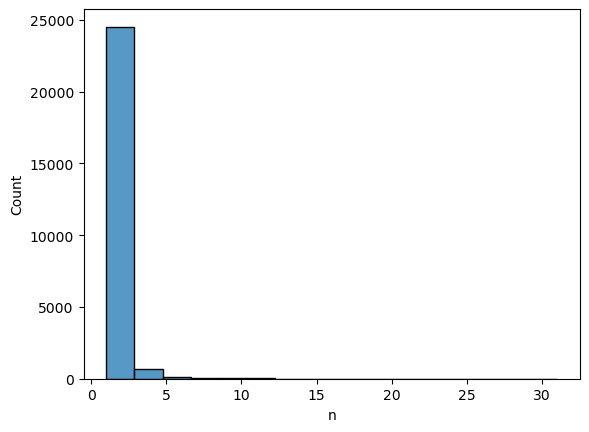

In [10]:
sns.histplot(x=crimes_vehicle_df['n'])

# Plotting Spatial distributions of crimes

## Criminal damage to vehicle

### Community Areas

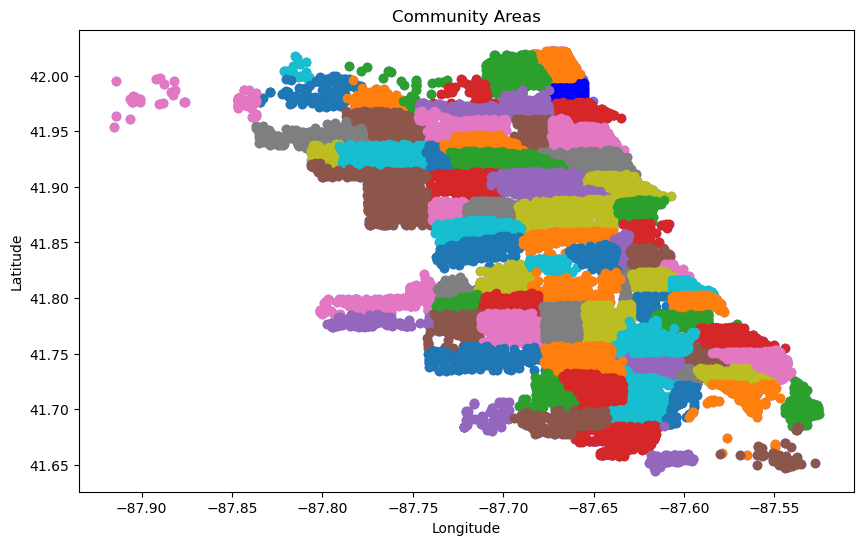

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plotting the original data points
plt.scatter(crimes_vehicle_df['Longitude'], crimes_vehicle_df['Latitude'], color='blue', alpha=0.5, label='Original Data')

num_areas = len(crimes_vehicle_df['Community Area'].unique())
# Plot each cluster with a different color
for area in range(num_areas):
    cluster_data = crimes_vehicle_df[crimes_vehicle_df['Community Area'] == area]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {area}')

# Plot cluster centers
#plt.scatter(centers[:, 0], centers[:, 1], s=100, c='red', label='Centers', marker='x')

plt.title('Community Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.legend()
plt.show()

### Using log transformation

<Axes: xlabel='n', ylabel='Count'>

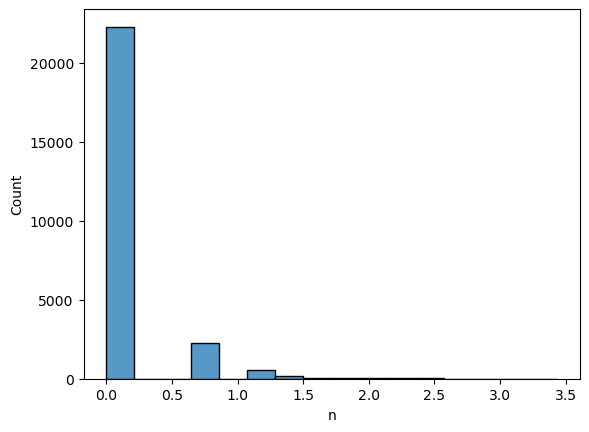

In [12]:
log_transformed_vehicle = crimes_vehicle_df.copy()
log_transformed_vehicle['n'] = np.log(log_transformed_vehicle['n']) 

sns.histplot(x=log_transformed_vehicle['n'])

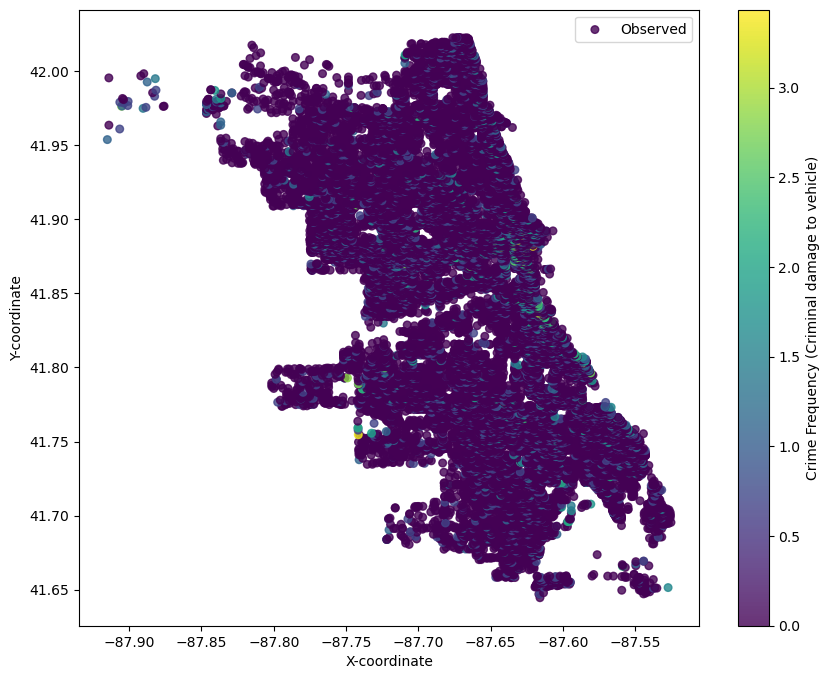

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

n_values_vehicle = log_transformed_vehicle['n']

# Increase figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot with color bar
scatter_plot = ax.scatter(log_transformed_vehicle['Longitude'], log_transformed_vehicle['Latitude'], c=n_values_vehicle, cmap='viridis', label='Observed', marker='o', s=30, alpha=0.8)

# Add color bar for crime frequency
cbar = plt.colorbar(scatter_plot, label='Crime Frequency (Criminal damage to vehicle)')

# Set labels and legend
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.legend()

# Display the plot
plt.show()

In [17]:
def show_outlier(dt, var):
    var_name = dt[var]

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    sns.boxplot(x=var_name)
    plt.title('Before Log Transformation')

    plt.subplot(2, 2, 2)
    sns.histplot(x=var_name, kde=True)
    plt.title('Before Log Transformation')

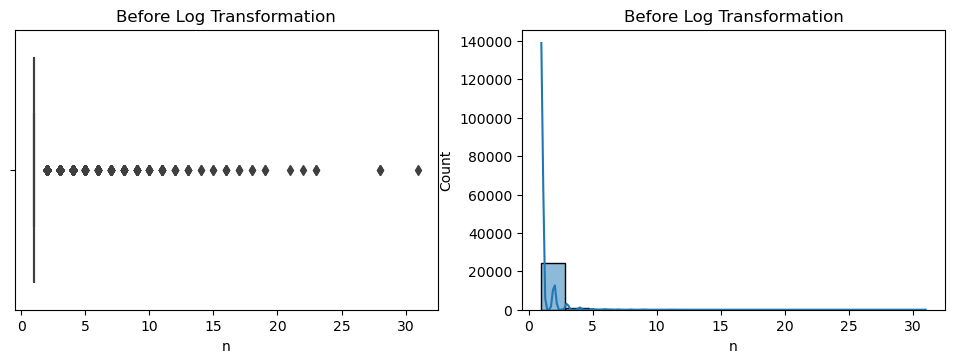

In [18]:
show_outlier(crimes_vehicle_df,'n')

In [19]:
def show_outlier(dt, var):
    var_name = dt[var]

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    sns.boxplot(x=var_name)
    plt.title('After Log Transformation')

    plt.subplot(2, 2, 2)
    sns.histplot(x=var_name, kde=True)
    plt.title('After Log Transformation')

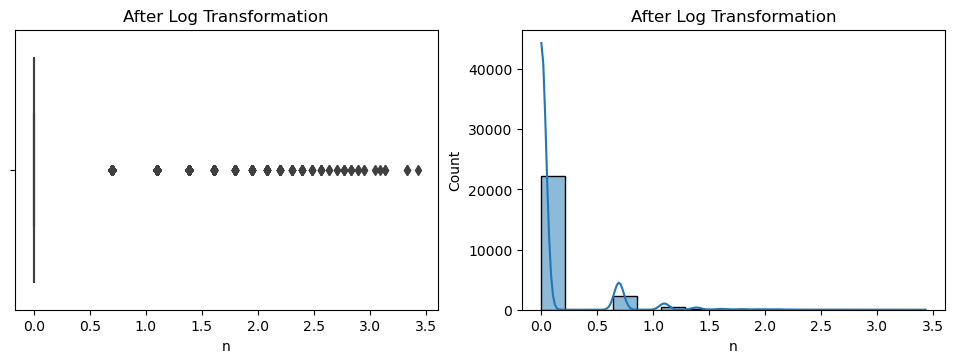

In [20]:
show_outlier(log_transformed_vehicle,'n')

In [26]:
log_transformed_vehicle.to_csv('crimes_processed_vehicle.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


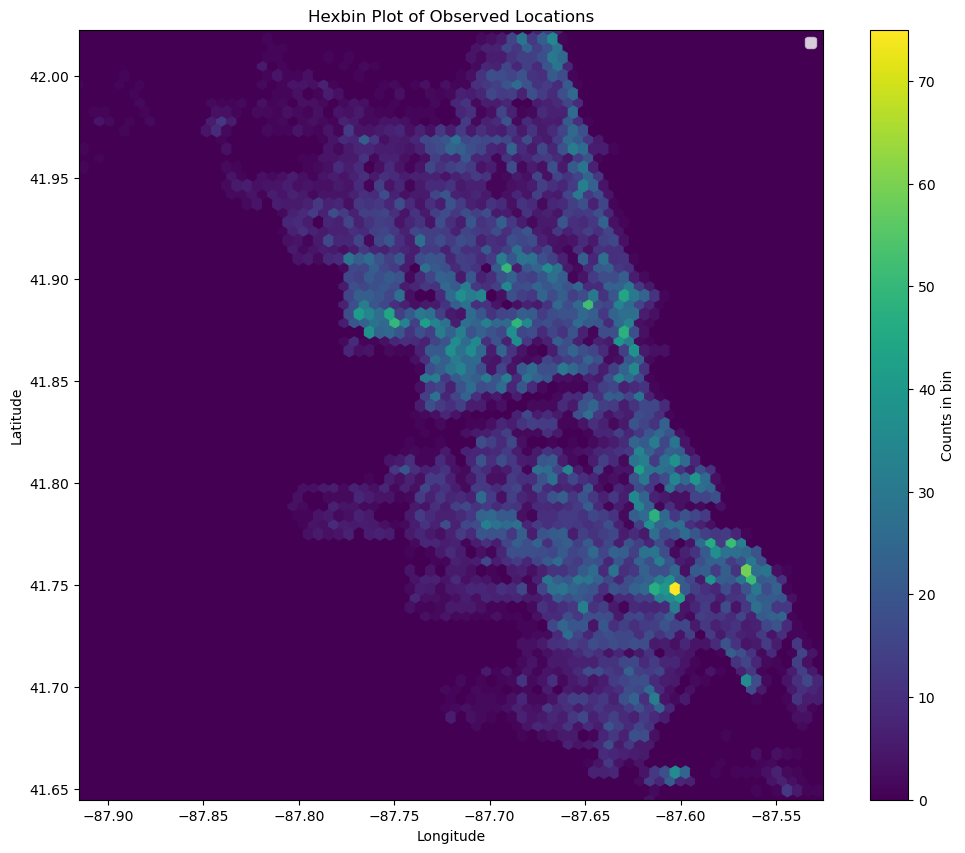

In [13]:
# Using full set: Convert columns to numpy arrays
observed_location_columns_crimes = ['Longitude', 'Latitude']
observed_values_column_crimes = 'n'
observed_locations_crimes = log_transformed_vehicle[observed_location_columns_crimes].values
observed_values_crimes = log_transformed_vehicle[observed_values_column_crimes].values

buffer = 0
x_min, x_max = observed_locations_crimes[:, 0].min() - buffer, observed_locations_crimes[:, 0].max() + buffer
y_min, y_max = observed_locations_crimes[:, 1].min() - buffer, observed_locations_crimes[:, 1].max() + buffer


plt.figure(figsize=(12,10))

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

#hb = plt.hexbin(crimes_df['Latitude'], crimes_df['Longitude'], gridsize=50, cmap='viridis')
hb = plt.hexbin(log_transformed_vehicle['Longitude'],log_transformed_vehicle['Latitude'], reduce_C_function=np.sum,gridsize=73, cmap='viridis')
plt.colorbar(hb, label='Counts in bin')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Hexbin Plot of Observed Locations')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


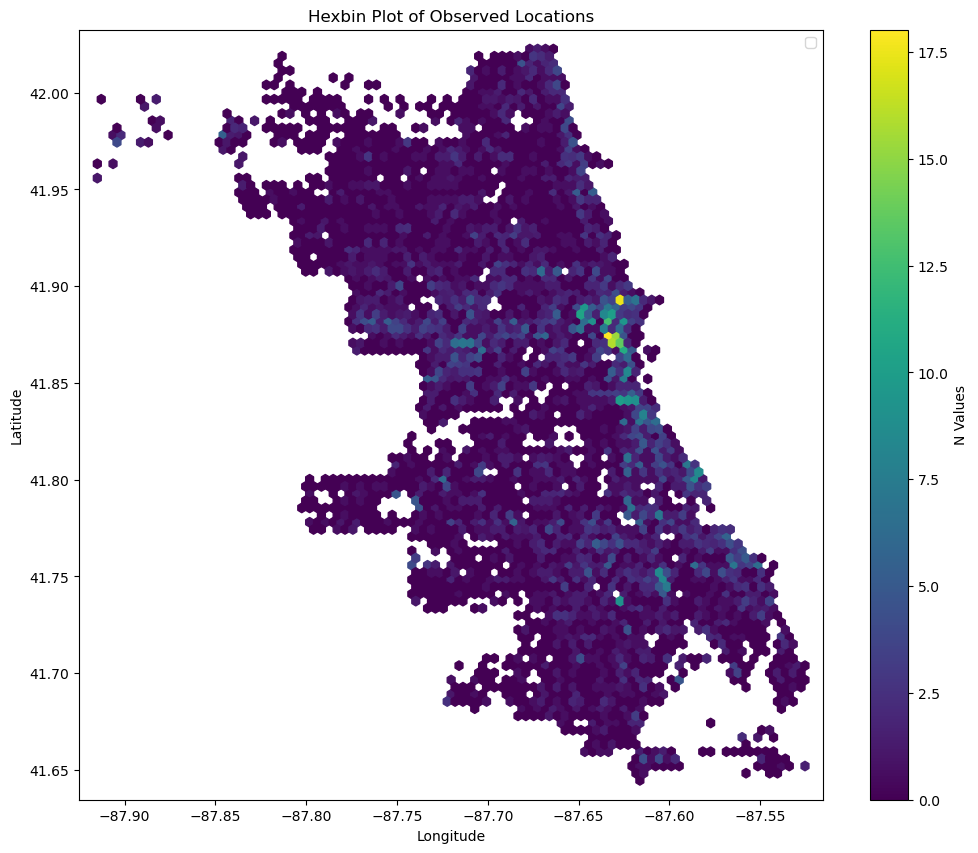

In [14]:
# Using full set: Convert columns to numpy arrays
observed_location_columns_crimes = ['Longitude','Latitude']
observed_values_column_crimes = 'n'
observed_locations_crimes = log_transformed_vehicle[observed_location_columns_crimes].values
observed_values_crimes = log_transformed_vehicle[observed_values_column_crimes].values

buffer = 0.01
x_min, x_max = observed_locations_crimes[:, 0].min() - buffer, observed_locations_crimes[:, 0].max() + buffer
y_min, y_max = observed_locations_crimes[:, 1].min() - buffer, observed_locations_crimes[:, 1].max() + buffer

plt.figure(figsize=(12,10))
#hb = plt.hexbin(crimes_df['Latitude'], crimes_df['Longitude'], gridsize=50, cmap='viridis')
hb = plt.hexbin(log_transformed_vehicle['Longitude'],log_transformed_vehicle['Latitude'],reduce_C_function=np.sum,  C = log_transformed_vehicle['n'], gridsize=90, cmap='viridis')
plt.colorbar(hb, label='N Values')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Hexbin Plot of Observed Locations')
plt.show()

### Using a subset of data where n > 2

In [21]:
subset_df_vehicle = crimes_vehicle_df[(crimes_vehicle_df['n'] > 2)]
subset_df_vehicle

Latitude  Longitude  n  location_id
28     41.651431 -87.527258  5           27
92     41.654602 -87.547147  3           81
184    41.657284 -87.604380  3          160
297    41.664363 -87.630614  3          261
306    41.665815 -87.558854  9          268
...          ...        ... ..          ...
30787  42.015041 -87.663503  9        25277
30799  42.015124 -87.680827  3        25280
30815  42.015464 -87.676452  3        25292
30935  42.019366 -87.669809  3        25403
30955  42.019974 -87.671912  3        25420

[944 rows x 4 columns]

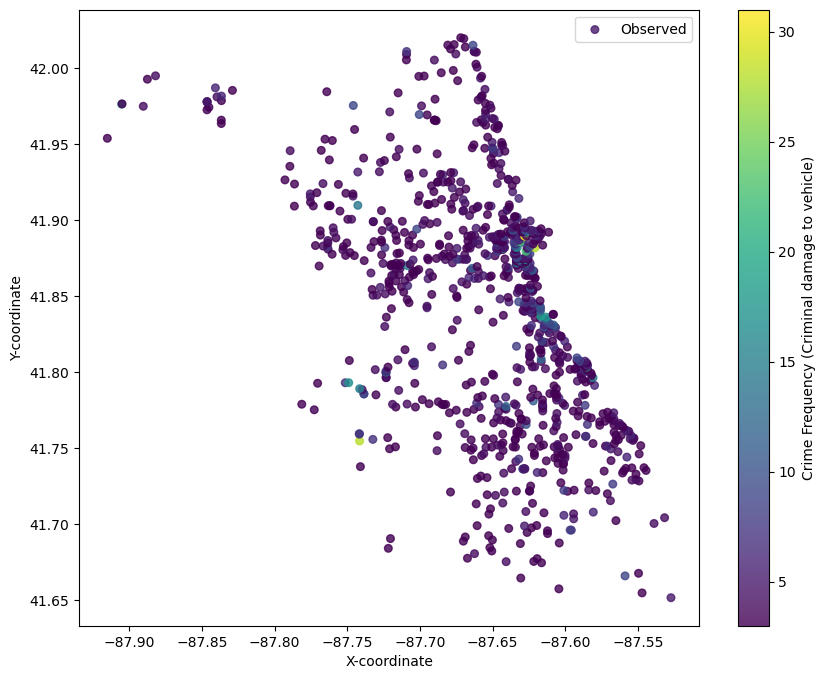

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

n_values_vehicle = subset_df_vehicle['n']

# Increase figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot with color bar
scatter_plot = ax.scatter(subset_df_vehicle['Longitude'], subset_df_vehicle['Latitude'], c=n_values_vehicle, cmap='viridis', label='Observed', marker='o', s=30, alpha=0.8)

# Add color bar for crime frequency
cbar = plt.colorbar(scatter_plot, label='Crime Frequency (Criminal damage to vehicle)')

# Set labels and legend
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.legend()

# Display the plot
plt.show()

### Using full dataset (All n values)

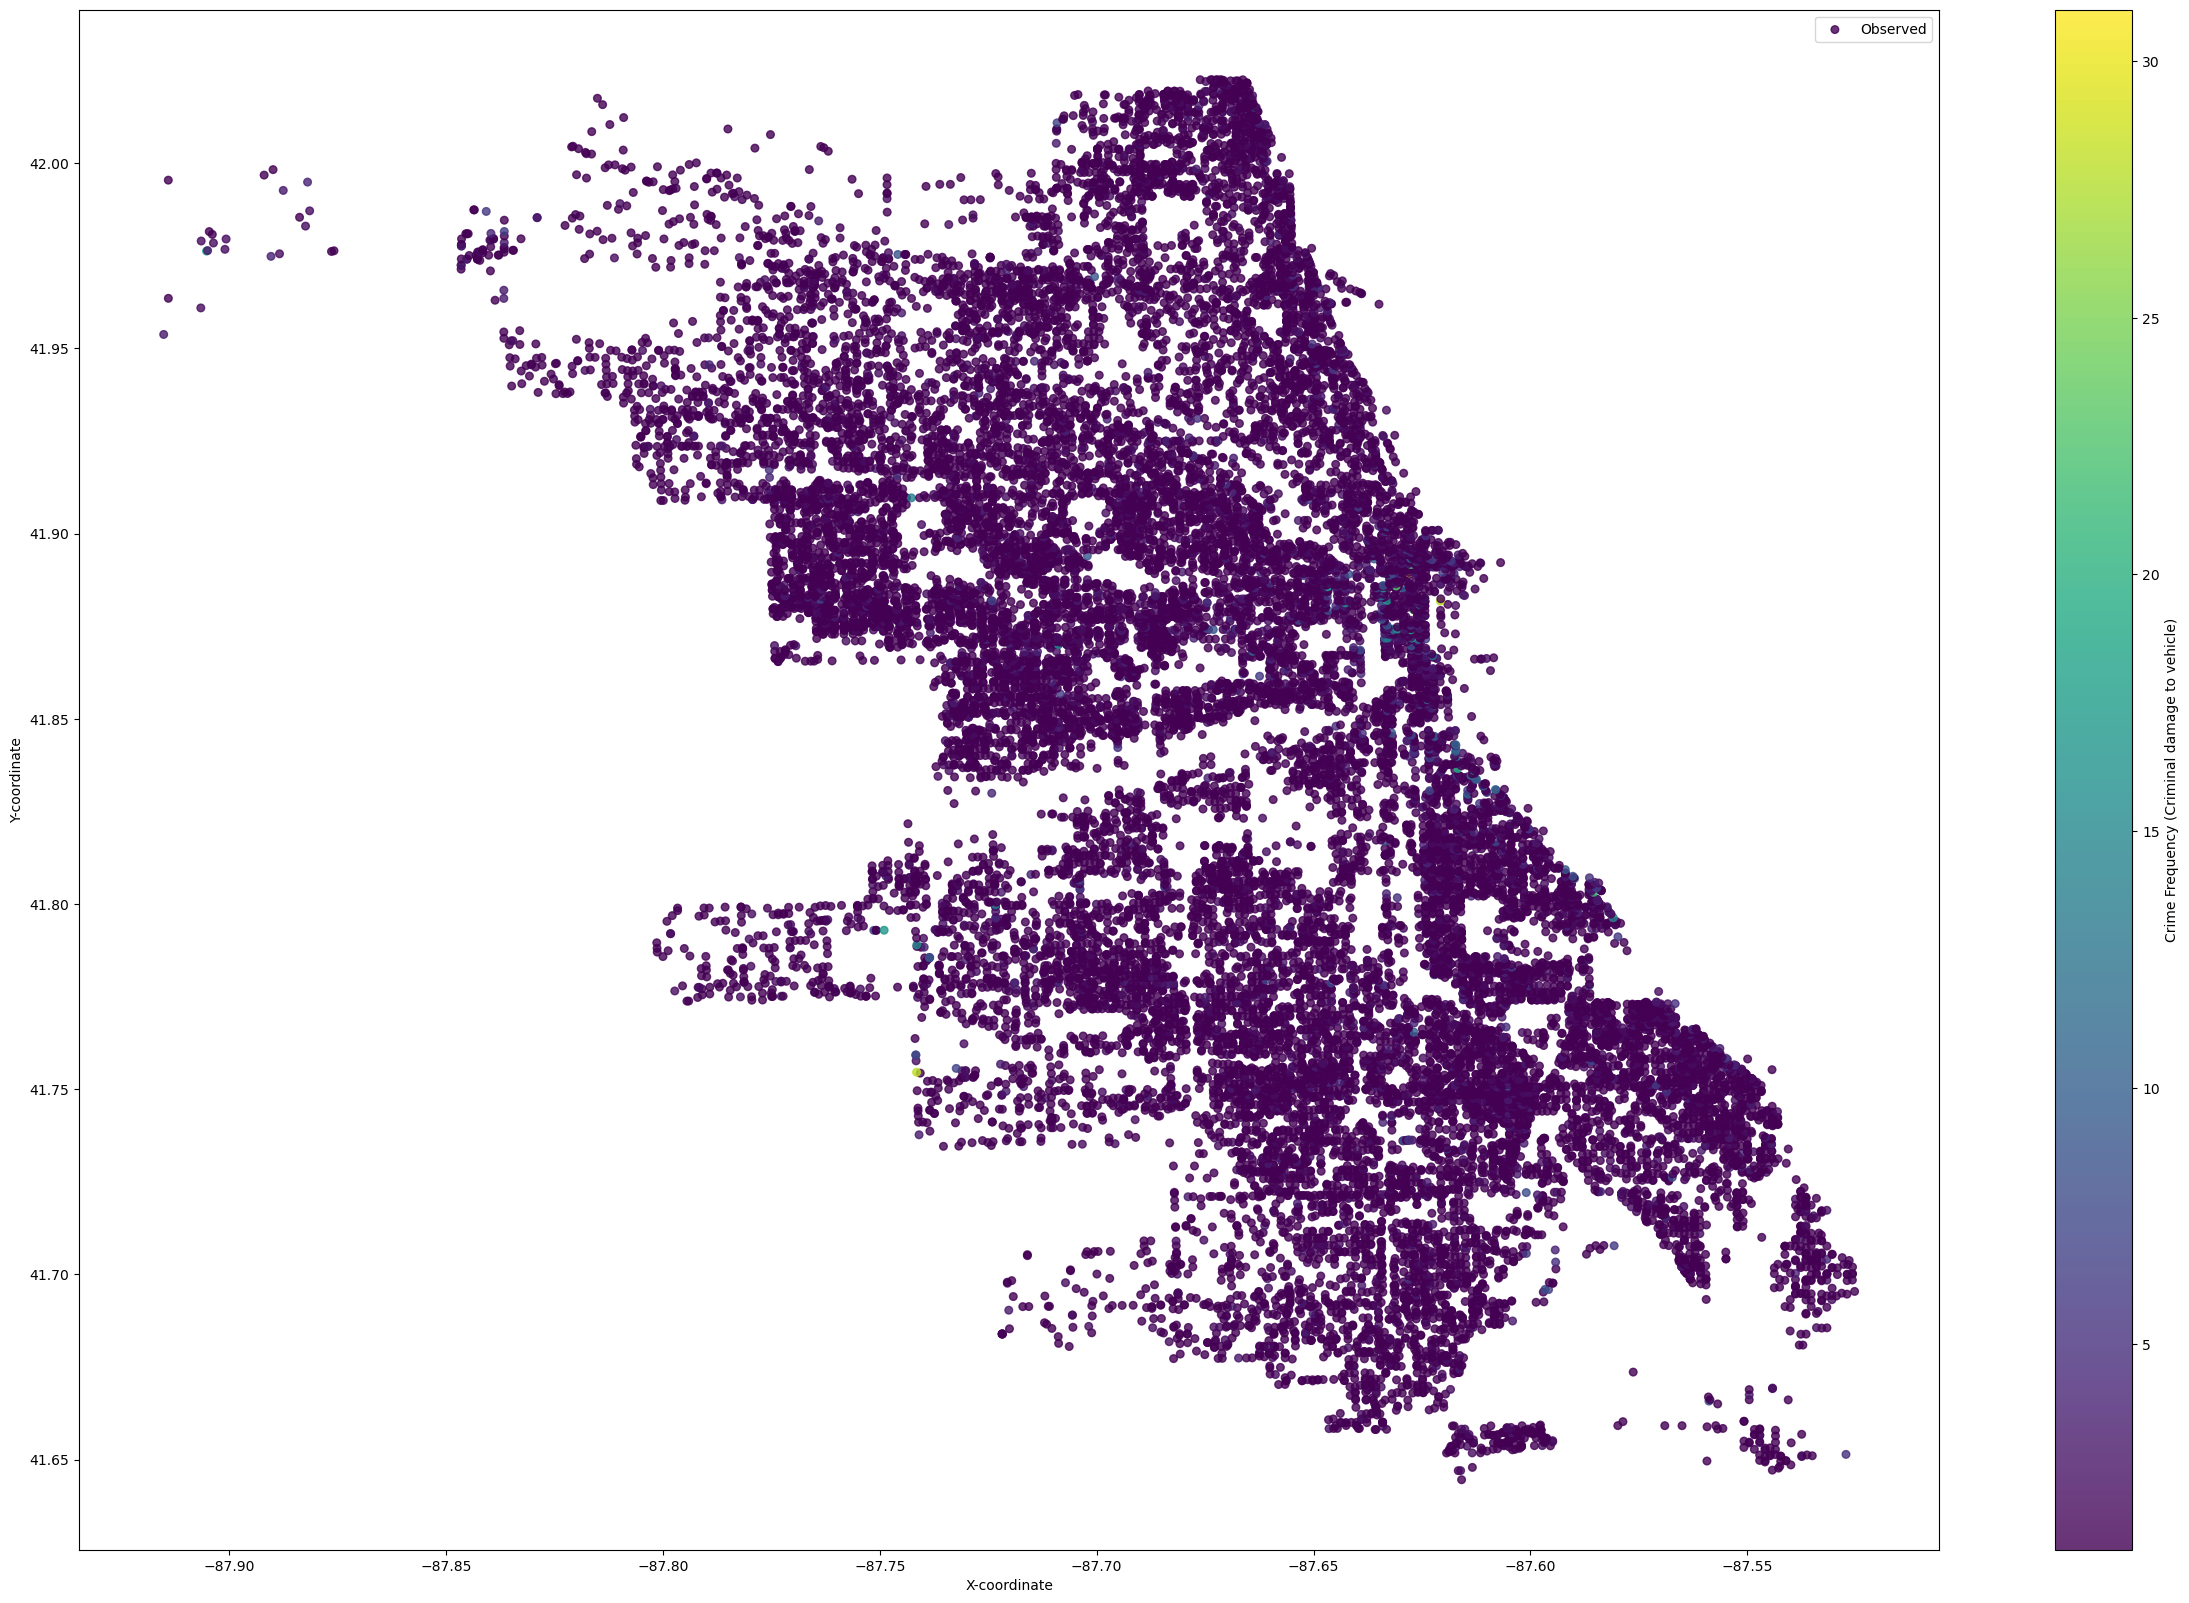

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

n_values_vehicle = crimes_vehicle_df['n']

# Increase figure size
fig, ax = plt.subplots(figsize=(30, 20))

# Scatter plot with color bar
scatter_plot = ax.scatter(crimes_vehicle_df['Longitude'], crimes_vehicle_df['Latitude'], c=n_values_vehicle, cmap='viridis', label='Observed', marker='o', s=30, alpha=0.8)

# Add color bar for crime frequency
cbar = plt.colorbar(scatter_plot, label='Crime Frequency (Criminal damage to vehicle)')

# Set labels and legend
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.legend()

# Display the plot
plt.show()